In [1]:
from glob import glob
import cv2

def get_videos(vid_id, kernel = None):
    if kernel == None:
        videos = [f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{vid_id}-left.mp4',
          f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/right/{vid_id}-right.mp4']
    else:
        if not isinstance(kernel, list):
            suffix = f'_{kernel}'
        else:
            temp = '_'.join(kernel)
            suffix = f'_{temp}'
        videos = [f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{vid_id}-left{suffix}.mp4',
          f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/right/{vid_id}-right{suffix}.mp4']
    return videos

def get_h5files(vid_id, kernel): 
    if kernel == None:
        h5files = glob(f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{vid_id}-leftDLC*.h5')+\
        glob(f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{vid_id}-leftDLC*.h5')
    else:
        if not isinstance(kernel, list):
                suffix = f'_{kernel}'
        else:
            temp = '_'.join(kernel)
            suffix = f'_{temp}'
        h5files = [f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{vid_id}-left{suffix}.h5',
          f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/right/{vid_id}-right{suffix}.h5']
    return h5files

def video_to_frames(video_path):
    
    vidcap = cv2.VideoCapture(video_path)
    success,image = vidcap.read()
    frames = []
    while success:
      frames.append(image)      
      success,image = vidcap.read()
    print(f'The number of frames is {len(frames)}')
    return frames
    

In [21]:
vid_id = '1644282413'
vid_id = '1644282488'
# vid_id = '1642994619'

kernel = ['nearest', 'median']
obj = 'pitcher'
# kernel = None
# videos = get_videos(vid_id, kernel = None)
# h5files = get_h5files(vid_id, kernel)
videos = [f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{obj}/{vid_id}-left.mp4',
         f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/right/{obj}/{vid_id}-right.mp4']
h5files = [f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{obj}/{vid_id}-left_linear_median.h5',
           f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/right/{obj}/{vid_id}-right_linear_median.h5']
frames_left = video_to_frames(videos[0])
frames_right = video_to_frames(videos[1])
suffix = '_'.join(kernel)



The number of frames is 313
The number of frames is 313


In [25]:
import cv2
destfolder = f'/home/luke/Desktop/project/make_tea/camera-main/videos/{vid_id}/left/{obj}/imgs'
for i, img in enumerate(frames_left):
    filename = destfolder + f'/{i}.png'
    cv2.imwrite(filename, img)

In [3]:
import pandas as pd
suffix = '_'.join(kernel)
df = pd.read_hdf(h5files[0])
df_new = df.copy()
df_new.columns = df_new.columns.set_levels(['z', 'x', 'y'], level='coords')

In [4]:
import importlib
importlib.reload(zedStereoUtility)

NameError: name 'zedStereoUtility' is not defined

In [5]:
import pandas as pd
from predictDepth import *
import zedStereoUtility as zed

x_inds = df_new.columns.values[::3]
y_inds = df_new.columns.values[1::3]
z_inds = df_new.columns.values[2::3]
disp_maps = []
coordinate3Ds = []
for i in range(len(frames_left)):
    data = df.iloc[i]
    x = data[x_inds].values
    y = data[y_inds].values
    pixels = np.c_[x,y]
    left_image = frames_left[i]
    right_image = frames_right[i]
    disp_map = getDisparityMap(left_image, right_image)
    disp_maps.append(disp_map)
    coordinate3D = zed.pixelTo3DCameraCoord(left_image, disp_map, pixels)
    coordinate3Ds.append(pixels)
    temp_x = [j['X'] for j in coordinate3D]
    temp_y = [j['Y'] for j in coordinate3D]
    temp_z = [j['Z'] for j in coordinate3D]
    df_new.iloc[i][x_inds] = temp_x
    df_new.iloc[i][y_inds] = temp_y
    df_new.iloc[i][z_inds] = temp_z
    
import os

outdir = os.path.dirname(os.path.dirname(os.path.dirname(h5files[0])))
filename = f'/{vid_id}_3D_{suffix}_leastereo.h5'

outname = outdir + filename
df_new.to_hdf(outname, key = 'leastereo')

===> Building LEAStereo model
Feature network path:[1 0 1 0 0 0]
Matching network path:[1 1 2 2 1 2 2 2 1 1 0 1] 

Total Params = 1.81MB
Feature Net Params = 0.10MB
Matching Net Params = 1.71MB
compute_average_flops_cost = 4850.32MB
=> loading checkpoint './run/sceneflow/best/checkpoint/best.pth'
Processing time: 0.0295
Processing time: 0.0292
Processing time: 0.0289
Processing time: 0.0293
Processing time: 0.0292
Processing time: 0.0296
Processing time: 0.0307
Processing time: 0.0354
Processing time: 0.0299
Processing time: 0.0293
Processing time: 0.0299
Processing time: 0.0288
Processing time: 0.0341
Processing time: 0.0364
Processing time: 0.0302
Processing time: 0.0310
Processing time: 0.0305
Processing time: 0.0319
Processing time: 0.0345
Processing time: 0.0306
Processing time: 0.0300
Processing time: 0.0314
Processing time: 0.0319
Processing time: 0.0302
Processing time: 0.0305
Processing time: 0.0328
Processing time: 0.0355
Processing time: 0.0352
Processing time: 0.0315
Proces

Processing time: 0.0300
Processing time: 0.0305
Processing time: 0.0290
Processing time: 0.0291
Processing time: 0.0294
Processing time: 0.0293
Processing time: 0.0296
Processing time: 0.0288
Processing time: 0.0285
Processing time: 0.0284
Processing time: 0.0323
Processing time: 0.0272
Processing time: 0.0274
Processing time: 0.0289
Processing time: 0.0278
Processing time: 0.0278
Processing time: 0.0283
Processing time: 0.0283
Processing time: 0.0318
Processing time: 0.0287
Processing time: 0.0319
Processing time: 0.0280
Processing time: 0.0283
Processing time: 0.0278
Processing time: 0.0273
Processing time: 0.0317
Processing time: 0.0289
Processing time: 0.0285
Processing time: 0.0278
Processing time: 0.0283
Processing time: 0.0274
Processing time: 0.0276
Processing time: 0.0280
Processing time: 0.0320
Processing time: 0.0283
Processing time: 0.0284
Processing time: 0.0276
Processing time: 0.0284
Processing time: 0.0328
Processing time: 0.0294
Processing time: 0.0283
Processing time:

In [25]:
outname

'/home/luke/Desktop/project/make_tea/camera-main/videos/1644282413/1644282413_3D_linear_median_leastereo.h5'

Processing time: 0.0272


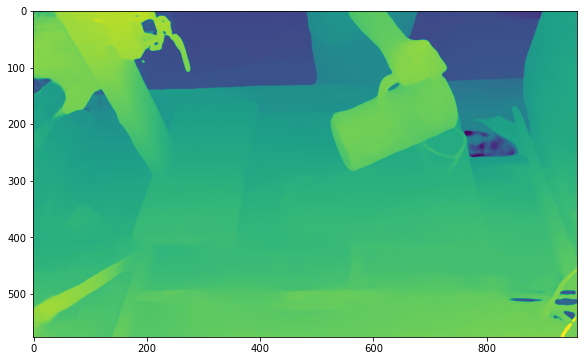

In [29]:
ind = 185
left_image, right_image = frames_left[ind], frames_right[ind]
disp_map = getDisparityMap(left_image, right_image)
plt.figure(figsize=(12, 6))
plt.imshow(disp_map)


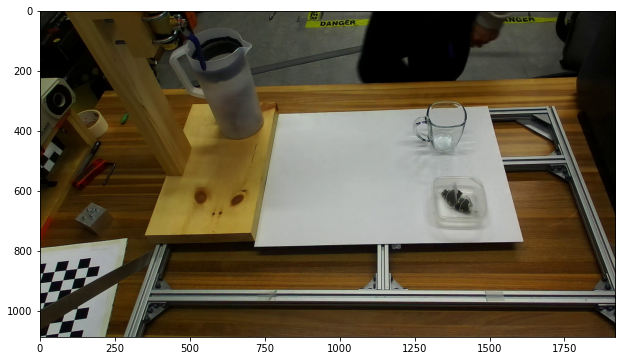

In [19]:
plt.figure(figsize=(12, 6))
l_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
plt.imshow(l_image)

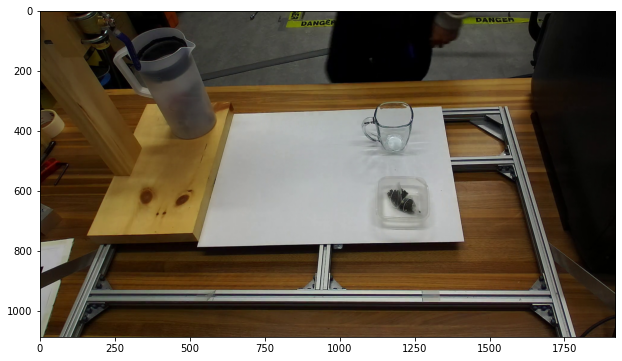

In [20]:
plt.figure(figsize=(12, 6))
r_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
plt.imshow(r_image)

Processing time: 0.0283


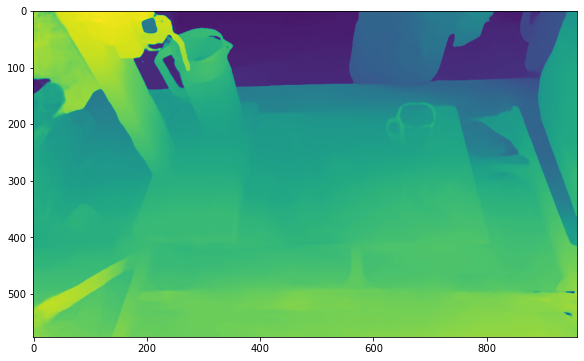

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from predictDepth import *
import zedStereoUtility as zed

ind = 35
left_image, right_image = frames_left[ind], frames_right[ind]
disp_map = getDisparityMap(left_image, right_image)
plt.figure(figsize=(12, 6))
plt.imshow(disp_map)


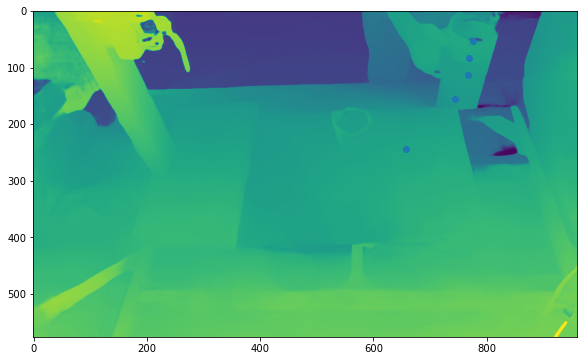

In [34]:
import matplotlib.pyplot as plt

ind = 35
plt.figure(figsize=(12, 6))
plt.imshow(disp_maps[ind])
plt.scatter(coordinate3Ds[ind][:,0]/2, coordinate3Ds[ind][:,1]/2)

In [3]:
import pandas as pd
from predictDepth import *
from zedStereoUtility import *

i = 357
left_image = frames_left[i]
right_image = frames_right[i]
disp_map = getDisparityMap(left_image, right_image)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(disp_maps[i])

Exception: No GPU found, please run without --cuda

In [58]:
outname

'/home/luke/Desktop/project/make_tea/camera-main/videos/1642994619/1642994619_3D_nearest_median_leastereo.h5'

In [42]:
df_new.iloc[0:20]

scorer      DLC_dlcrnetms5_make_tea_pitcherJan29shuffle1_110000              \
individuals                                             pitcher               
bodyparts                                             bodypart1               
coords                                                        x           y   
0                                                   -26.214335   -26.214335   
1                                                   -26.306786   -26.306786   
2                                                   -26.189238   -26.189238   
3                                                   -26.119379   -26.119379   
4                                                   -26.206040   -26.206040   
5                                                   -26.473435   -26.473435   
6                                                   -28.187027   -27.894175   
7                                                   -24.023340   -23.335171   
8                                                   -23.924053   -23.299404   
9                                                   -23.899720   -23.275706   
10                                                  -23.794825   -23.173550   
11                                                  -23.469393   -23.037062   
12                                                  581.280000   171.115000   
13                                                  581.280000   171.990000   
14                                                  580.863000   172.084000   
15                                                  580.782000   172.084000   
16                                                  580.340000   172.084000   
17                                                  579.721000   172.450000   
18                                                  578.970000   172.450000   
19                                                  578.970000   172.455000   

scorer                                                                 \
individuals                                                             
bodyparts                bodypart2                          bodypart3   
coords               z           x           y          z           x   
0            67.562718  -23.275097  -20.269796  63.942574  -22.974026   
1            67.800995  -23.271835  -20.266956  63.933614  -22.944631   
2            67.498036  -23.187954  -20.193905  63.703170  -22.911320   
3            67.317986  -23.212594  -20.215363  63.770861  -23.196123   
4            67.541341  -23.276673  -20.271169  63.946904  -23.231586   
5            68.230503  -23.092795  -20.111033  63.441746  -23.237154   
6            73.213058  -23.138129  -20.150514  63.566289  -23.128920   
7            62.560781  -23.691904  -20.189069  63.687915  -23.395136   
8            62.464890  -23.723938  -20.152592  63.774026  -23.336357   
9            62.401357  -23.691267  -19.870095  63.686202  -23.380298   
10           62.127481  -23.749215  -19.918697  63.841977  -23.373717   
11           61.761560  -23.379325  -19.866038  63.877937  -23.285893   
12            1.000000  595.411000  232.526000   1.000000  620.304000   
13            1.000000  595.684000  232.526000   0.999000  619.645000   
14            1.000000  595.792000  232.064000   0.613000  619.645000   
15            1.000000  596.050000  229.848000   0.983000  619.119000   
16            1.000000  596.407000  229.186000   0.999000  618.692000   
17            1.000000  596.407000  229.848000   0.998000  619.119000   
18            1.000000  596.050000  229.848000   0.999000  619.346000   
19            1.000000  594.174000  231.460000   0.998000  619.346000   

scorer                                                                 \
individuals                                                             
bodyparts                            bodypart4                          
coords                y          z           x           y          z   
0            -17.584225  67.372510  -22.828826  -12.458633

In [23]:
df.iloc[:20]

scorer      DLC_dlcrnetms5_make_tea_pitcherJan29shuffle1_110000           \
individuals                                             pitcher            
bodyparts                                             bodypart1            
coords                                                        x        y   
0                                                      572.384   156.223   
1                                                      572.384   156.223   
2                                                      572.384   156.223   
3                                                      572.384   156.223   
4                                                      572.384   156.223   
5                                                      572.384   156.223   
6                                                      575.879   163.394   
7                                                      576.551   171.300   
8                                                      577.189   171.300   
9                                                      577.189   171.362   
10                                                     577.663   171.990   
11                                                     580.863   171.990   
12                                                     581.280   171.115   
13                                                     581.280   171.990   
14                                                     580.863   172.084   
15                                                     580.782   172.084   
16                                                     580.340   172.084   
17                                                     579.721   172.450   
18                                                     578.970   172.450   
19                                                     578.970   172.455   

scorer                                                                   \
individuals                                                               
bodyparts              bodypart2                     bodypart3            
coords      likelihood         x        y likelihood         x        y   
0                0.010   596.501  227.457      0.010   619.511  283.747   
1                0.010   596.501  227.457      0.010   619.511  283.747   
2                0.010   596.501  227.457      0.010   619.511  283.747   
3                0.010   596.501  227.457      0.010   619.511  283.747   
4                0.010   596.501  227.457      0.010   619.511  283.747   
5                0.042   596.501  227.457      0.474   619.511  283.747   
6                0.406   596.058  227.646      0.226   619.727  284.055   
7                1.000   588.301  227.695      0.899   619.727  300.115   
8                1.000   588.108  228.914      0.300   620.071  300.115   
9                1.000   588.108  232.526      0.974   620.304  300.156   
10               1.000   588.108  232.526      0.409   620.902  300.156   
11               1.000   594.831  233.120      0.998   620.304  301.107   
12               1.000   595.411  232.526      1.000   620.304  301.107   
13               1.000   595.684  232.526      0.999   619.645  301.168   
14               1.000   595.792  232.064      0.613   619.645  301.168   
15               1.000   596.050  229.848      0.983   619.119  301.107   
16               1.000   596.407  229.186      0.999   618.692  300.862   
17               1.000   596.407  229.848      0.998   619.119  301.168   
18               1.000   596.050  229.848      0.999   619.346  301.230   
19               1.000   594.174  231.460      0.998   619.346  300.862   

scorer                                                                   \
individuals                                                               
bodyparts              bodypart4                     bodypart5            
coords      likelihood         x        y likelihood         x        y   
0                0.010   643.863  371.614      0.010   644.339  428.381   